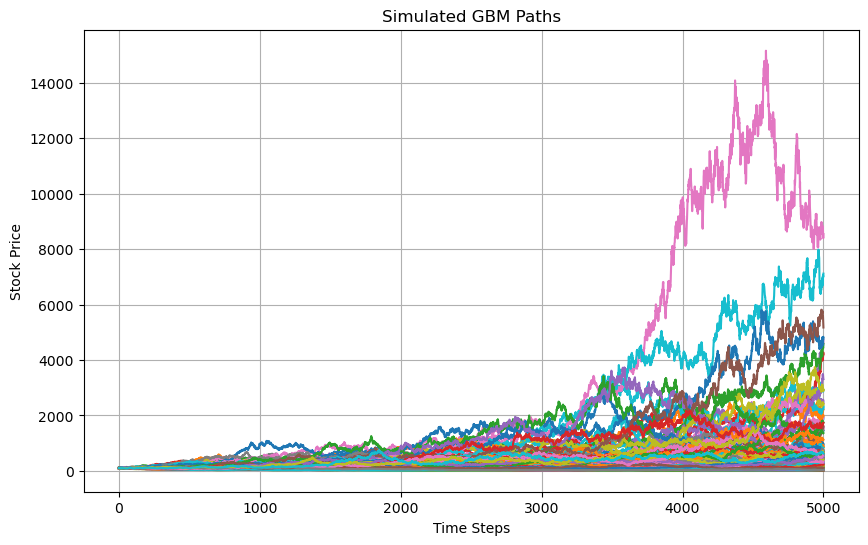

The mean of the final stock prices from 100 simulated paths is: 1065.669634336607


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GBM:
    def __init__(self, s_0, iteration, num_paths, mu, sigma):
        self.s_0 = s_0
        self.iteration = iteration
        self.num_paths = num_paths
        self.mu = mu
        self.sigma = sigma

    def monte_carlo(self):
        dt = 0.01
        all_paths = []
        for i in range(self.num_paths):
            prices = [self.s_0]
            for j in range(self.iteration):
                s_t = prices[-1]
                ds = s_t * (self.mu * dt + self.sigma * np.sqrt(dt) * np.random.randn())
                prices.append(s_t + ds)
            all_paths.append(prices)
        return all_paths

    def calculate_mean_price(self, paths):
        final_prices = [path[-1] for path in paths]
        mean_final_price = np.mean(final_prices)
        print(f"The mean of the final stock prices from {len(paths)} simulated paths is: {mean_final_price}")

# Parameters
s_0 = 100
iterations = 5000
mu = 0.05
sigma = 0.2
num_paths = 100

# Create GBM instance
gbm = GBM(s_0, iterations, num_paths, mu, sigma)

# Simulate paths
paths = gbm.monte_carlo()

# Plot paths
plt.figure(figsize=(10, 6))
for path in paths:
    plt.plot(path)
plt.title('Simulated GBM Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Calculate mean final price
gbm.calculate_mean_price(paths)
